In [0]:
!pip install ipywidgets -qq

In [2]:
!apt-get install ffmpeg  > /dev/null

Extracting templates from packages: 100%


RESTART RUNTIME (FROM TOOL BAR) AFTER COMPLETING THE ABOVE INSTALLS: Runtime -> Restart runtime...

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [0]:
#Generate 100 fake data points
def lin(w,b,x): 
  return w*x+b

def gen_fake_data(n, w, b):
    x = np.random.uniform(0,1,n) 
    y = lin(w,b,x) + 0.1 * np.random.normal(0,5,n)
    return x, y

x, y = gen_fake_data(100, 3., 8.)

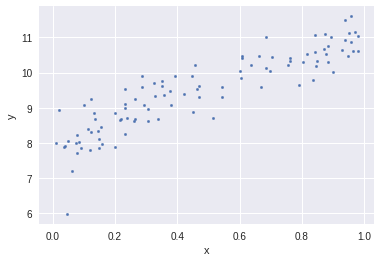

In [9]:
plt.scatter(x,y, s=6); 
plt.xlabel("x"); 
plt.ylabel("y");

In [0]:
# mean squared error between predictions and true values
def mse(y_hat, y): 
  return ((y_hat - y) ** 2).mean()

In [0]:
# loss fuction for linear regression
def mse_loss(w, b, x, y): 
  return mse(lin(w,b,x), y)

In [12]:
# randomly initialize w and b
w,b = np.random.randn(1)[0],np.random.randn(1)[0]
mse_loss(w, b, x, y)

119.51069960493649

In [0]:
learning_rate=0.01

# training loop
def upd():
    global w, b
    #prediction with current weight and bias
    y_hat = lin(w, b, x)
    
    #partial derivative with respect to b
    dydb = 2 * (y_hat - y)
    
    #partial derivative with respect to w
    dydw = x*dydb
    
    #update w
    w = w - learning_rate*dydw.mean()
    
    #update b
    b = b - learning_rate*dydb.mean()

In [14]:
# code to animate the training loop
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(w,b,x))
plt.close()

def animate(i):
    line.set_ydata(lin(w,b,x))
    for i in range(30): 
      upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=100)
ani

In [119]:
#final w and b
w, b

(3.8186351925321067, 7.585792892563759)